In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Читаем данные, добавлем хедер

In [68]:
data = pd.read_csv('scoring_approval_data.csv', header=None, na_values='?')
data.columns = ['F{}'.format(i) for i in xrange(1, 16)] + ['class']
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


### Смотрим статистики для количественных и номинальных признаков

In [69]:
data.describe()

,F2,F3,F8,F11,F14,F15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [70]:
data.describe(include=['object'])

,F1,F4,F5,F6,F7,F9,F10,F12,F13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


### Выделяем столбцы с количественными и номинальными признаками

In [89]:
categorical_columns = list(data.select_dtypes(include=['object']).columns)
numerical_columns = list(data.select_dtypes(exclude=['object']).columns)
print categorical_columns
print numerical_columns

['F1', 'F4', 'F5', 'F6', 'F7', 'F9', 'F10', 'F12', 'F13', 'class']
['F2', 'F3', 'F8', 'F11', 'F14', 'F15']


### Смотрим на данные

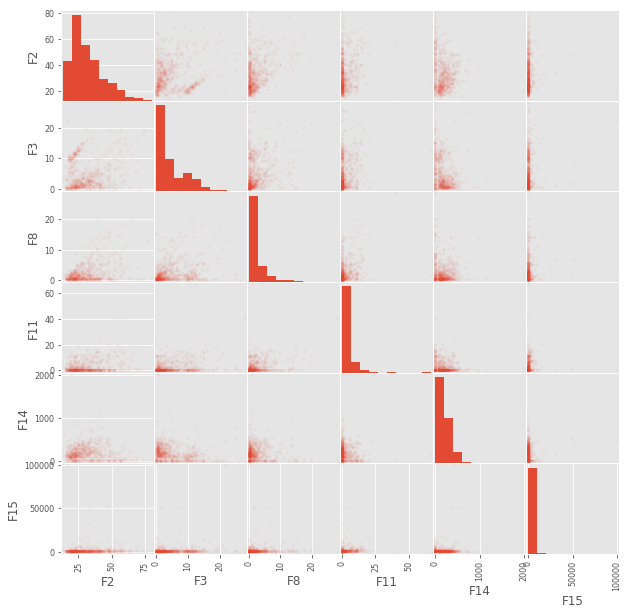

In [47]:
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [48]:
data.corr()

,F2,F3,F8,F11,F14,F15
F2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
F3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
F8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
F11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
F14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
F15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


### Строим диаграммы рассеяния для каждой пары количественных признаков

In [49]:
from itertools import combinations

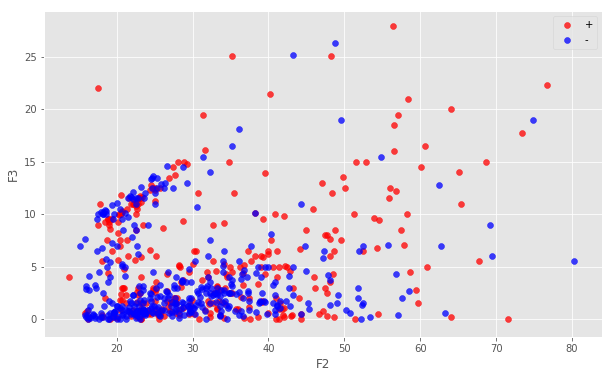

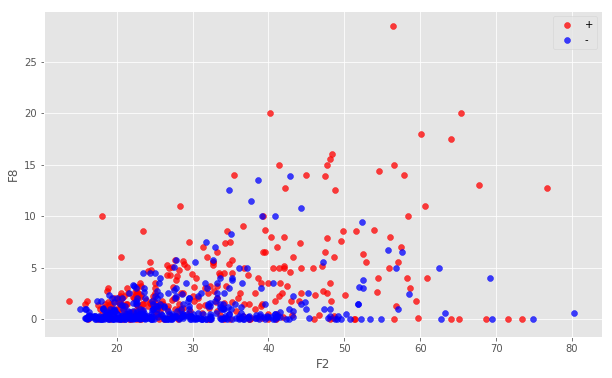

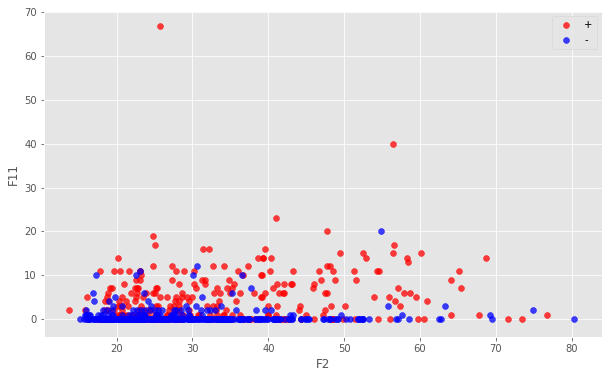

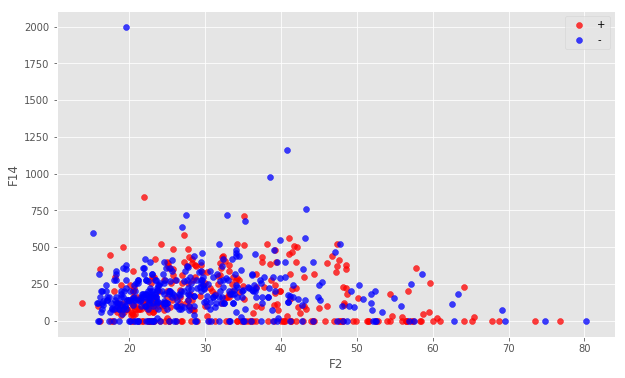

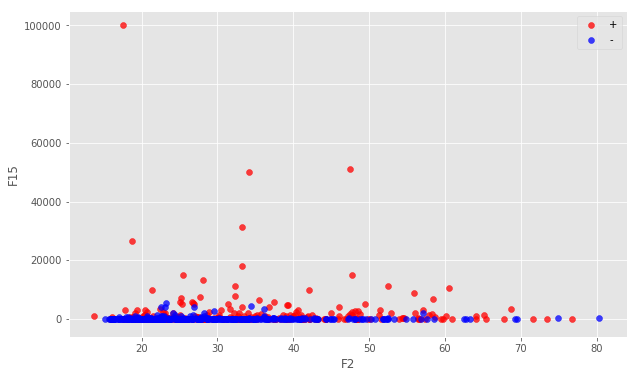

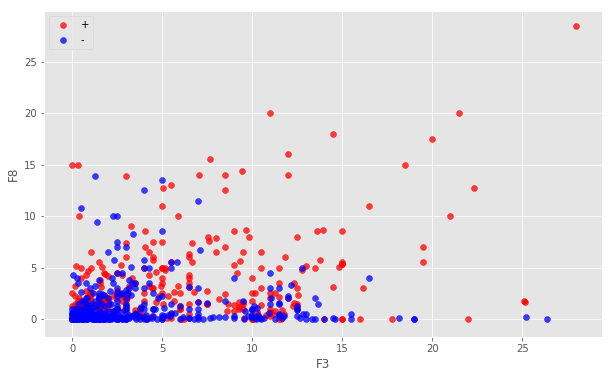

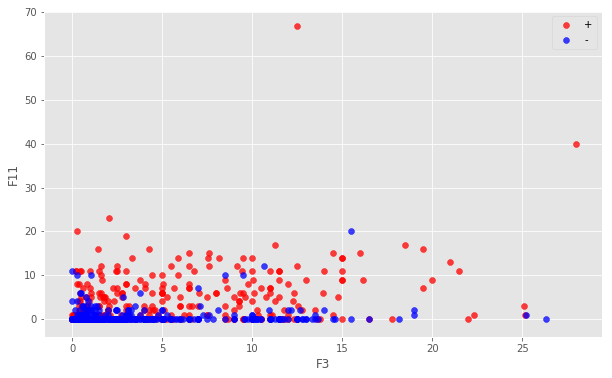

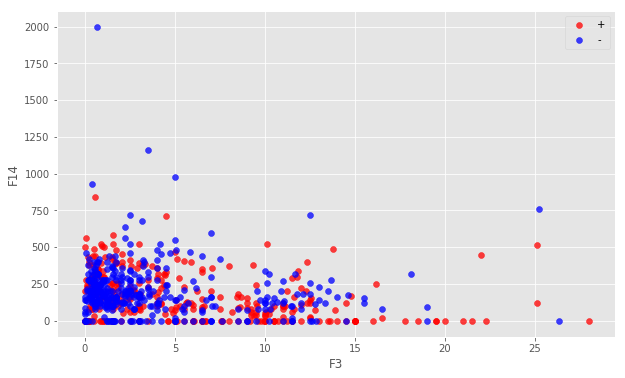

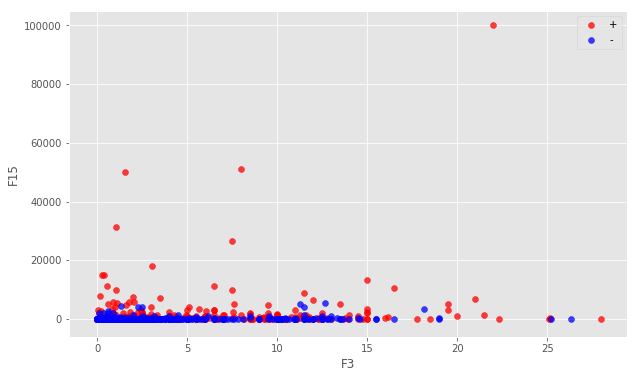

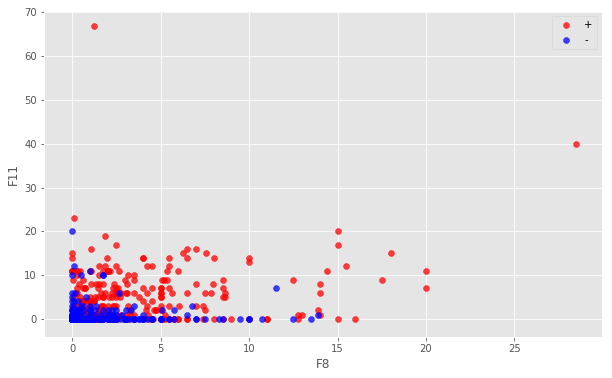

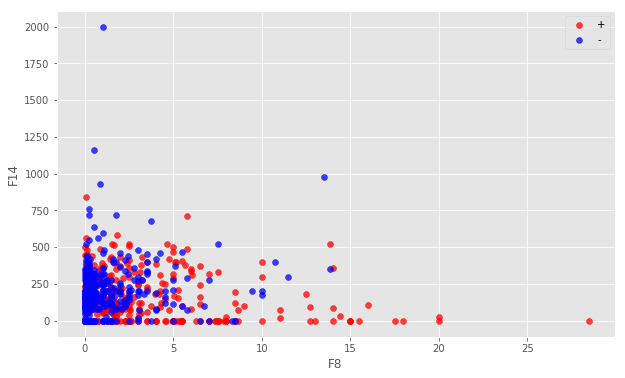

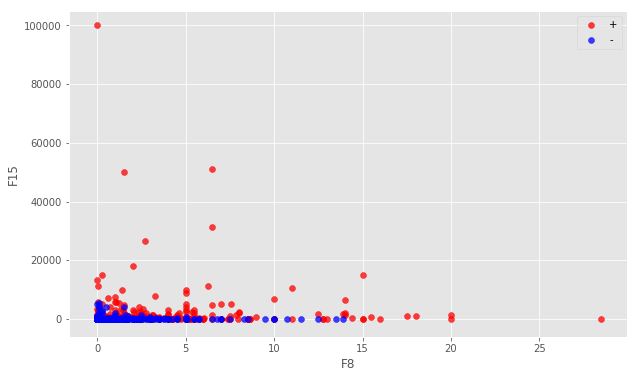

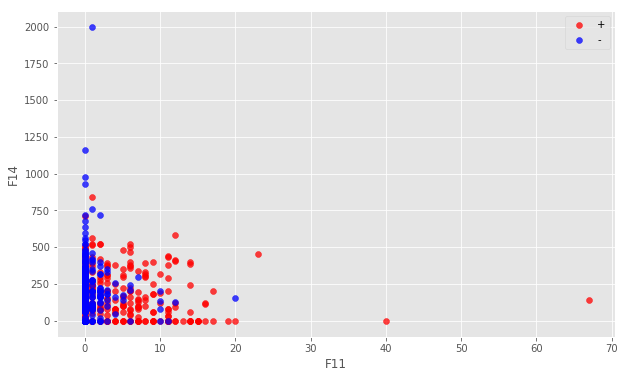

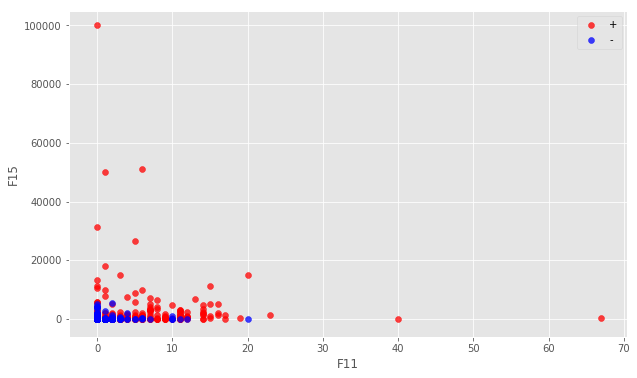

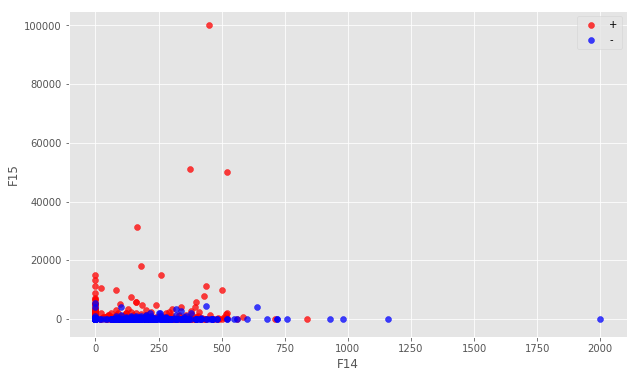

In [50]:
for col1, col2 in combinations(numerical_columns, 2):
    plt.figure(figsize=(10, 6))

    plt.scatter(data[col1][data['class'] == '+'],
                data[col2][data['class'] == '+'],
                alpha=0.75,
                color='red',
                label='+')

    plt.scatter(data[col1][data['class'] == '-'],
                data[col2][data['class'] == '-'],
                alpha=0.75,
                color='blue',
                label='-')

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(loc='best');

### Готовим данные: избавляемся от пропусков

In [72]:
for column in categorical_columns:
    print data[column].unique()

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


In [73]:
data.count(axis=0)

F1       678
F2       678
F3       690
F4       684
F5       684
F6       681
F7       681
F8       690
F9       690
F10      690
F11      690
F12      690
F13      690
F14      677
F15      690
class    690
dtype: int64

In [74]:
# Заполняем пропуски количественных признаков медианами
data = data.fillna(data.median(axis=0), axis=0)

In [78]:
cat_col_describe = data.describe(include=[object])
cat_col_describe

,F1,F4,F5,F6,F7,F9,F10,F12,F13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [77]:
# Заполняем пропуски номинальных признаков
for col in categorical_columns:
    data[col] = data[col].fillna(cat_col_describe[col]['top'])

### Преобразумем номинальные признаки в количественные

In [79]:
binary_columns = [col for col in categorical_columns
                  if cat_col_describe[col]['unique'] == 2]
nonbinary_columns = [col for col in categorical_columns
                     if cat_col_describe[col]['unique'] > 2]
print binary_columns, nonbinary_columns

['F1', 'F9', 'F10', 'F12', 'class'] ['F4', 'F5', 'F6', 'F7', 'F13']


In [80]:
for col in binary_columns:
    top = cat_col_describe[col]['top']
    top_items = data[col] == top
    data.loc[top_items, col] = 0
    data.loc[np.logical_not(top_items), col] = 1
    
data[binary_columns].describe()

,F1,F9,F10,F12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383


In [86]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

### Нормализуем количественные признаки

In [90]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,F2,F3,F8,F11,F14,F15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-2.497197e-15,1.956567e-16,4.942906e-16,1.029772e-17,3.861645e-17,-2.059544e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


### Объединяем всё в одну таблицу

In [91]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print data.shape
print data.columns

(690, 43)
Index([u'F2', u'F3', u'F8', u'F11', u'F14', u'F15', u'F1', u'F9', u'F10',
       u'F12', u'class', u'F4_l', u'F4_u', u'F4_y', u'F5_g', u'F5_gg', u'F5_p',
       u'F6_aa', u'F6_c', u'F6_cc', u'F6_d', u'F6_e', u'F6_ff', u'F6_i',
       u'F6_j', u'F6_k', u'F6_m', u'F6_q', u'F6_r', u'F6_w', u'F6_x', u'F7_bb',
       u'F7_dd', u'F7_ff', u'F7_h', u'F7_j', u'F7_n', u'F7_o', u'F7_v',
       u'F7_z', u'F13_g', u'F13_p', u'F13_s'],
      dtype='object')


### Разбиваем все данные на столбцы с фичами и столбец с ответом

In [92]:
X = data.drop(('class'), axis=1)
y = data['class']
feature_names = X.columns
print feature_names

Index([u'F2', u'F3', u'F8', u'F11', u'F14', u'F15', u'F1', u'F9', u'F10',
       u'F12', u'F4_l', u'F4_u', u'F4_y', u'F5_g', u'F5_gg', u'F5_p', u'F6_aa',
       u'F6_c', u'F6_cc', u'F6_d', u'F6_e', u'F6_ff', u'F6_i', u'F6_j',
       u'F6_k', u'F6_m', u'F6_q', u'F6_r', u'F6_w', u'F6_x', u'F7_bb',
       u'F7_dd', u'F7_ff', u'F7_h', u'F7_j', u'F7_n', u'F7_o', u'F7_v',
       u'F7_z', u'F13_g', u'F13_p', u'F13_s'],
      dtype='object')
